## Importações e Informações do dataset

In [2]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/earthquake_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

# Visualização dos tipos de dados
print("\nTipos de dados no dataset:\n")
print(data.dtypes)

Primeiros registros do dataset:


Tipos de dados no dataset:

Date           object
Time (utc)     object
Region         object
Magnitude     float64
Depth (km)      int64
Latitude       object
Longitude      object
Mode           object
Map            object
dtype: object


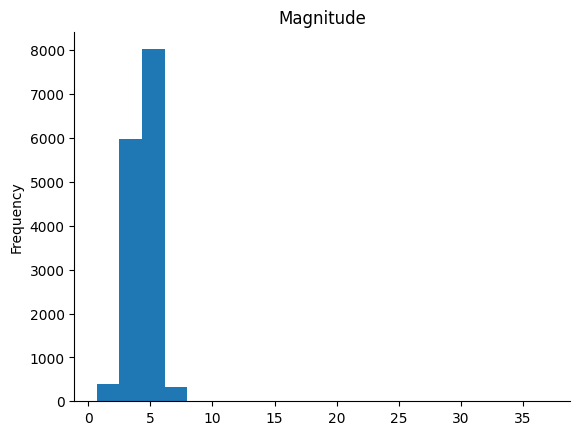

In [2]:
# @title Magnitude

from matplotlib import pyplot as plt
data['Magnitude'].plot(kind='hist', bins=20, title='Magnitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pré-processamento

In [3]:
# Tratamento de valores faltantes (se necessário)
data = data.dropna()

# Remover colunas que não são necessárias para a análise
data = data.drop(columns=['Date'])

# Transformação de atributos categóricos para numéricos usando get_dummies (se houver colunas categóricas)
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns)

# Amostragem do dataset para evitar estouro de memória
data_sampled = data.sample(n=5000, random_state=42)  # Ajuste o valor conforme necessário

# Separação entre atributos (X) e rótulos (y)
# Substitua 'magnitude' pelo nome da coluna correta do seu dataset
X = data_sampled.drop(columns=['Magnitude'])
y = data_sampled['Magnitude']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regressão Linear


Erro Quadrático Médio (MSE):

0.6657038492659357

Coeficiente de Determinação (R^2):

0.2938213745169944


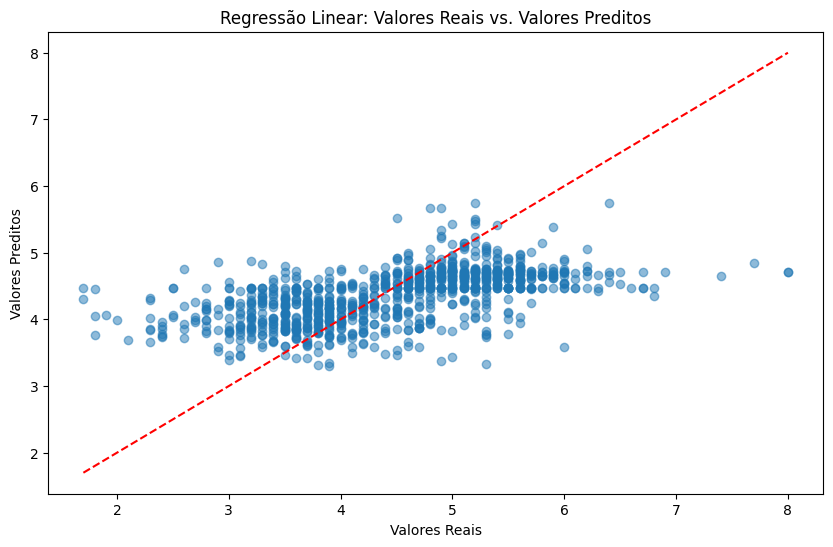

In [4]:
# Criação e treinamento do modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nErro Quadrático Médio (MSE):\n")
print(mse)

print("\nCoeficiente de Determinação (R^2):\n")
print(r2)

# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Regressão Linear: Valores Reais vs. Valores Preditos')
plt.show()